In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Folders and Files

In [2]:
estimates_exp = True

In [3]:
experiments_folder = ('./experiments' 
                      + '/100_FPS'
                      + '/03_estimates__V5_StandAlone_rtl_hls')

if estimates_exp == False:
    experiments_folder += '/output_full_build'
else:
    experiments_folder += '/output_estimates_only'

estimates_folder = experiments_folder + '/report'

final_hw_config_file = experiments_folder + '/final_hw_config.json'
layer_resources_file = estimates_folder + '/estimate_layer_resources.json'
layer_alternatives_file = estimates_folder + '/estimate_layer_config_alternatives.json'

# JSON to Dict

In [4]:
if estimates_exp == False:
    with open(final_hw_config_file, 'r') as hw_json_file:
        hw_config = json.load(hw_json_file)

with open(layer_resources_file, 'r') as layer_json_file:
    layer_config = json.load(layer_json_file)

with open(layer_alternatives_file, 'r') as alternatives_json_file:
    alternatives_config = json.load(alternatives_json_file)

# FIFO Depth

In [5]:
if estimates_exp == False:
    fifo_depth = {}
    for k in hw_config.keys():
        if k == "Defaults":
            continue
        elif "FIFO" in k:
            fifo_depth.update({k: hw_config[k]["depth"]})    

In [6]:
if estimates_exp == False:
    fig, ax = plt.subplots(figsize=(10,3))
    
    plt.axhline(y=16384, color='r', linestyle='--')
    #plt.axhline(y=32768, color='r', linestyle='--')
    ax.bar(list(fifo_depth.keys()), list(fifo_depth.values()))
    ax.set_xticks(list(fifo_depth.keys()))
    ax.set_xticklabels(list(fifo_depth.keys()), rotation=90, fontsize=8)
    ax.set_title("FIFO Depth")
    
    plt.show()

# Estimate Resources

In [7]:
# BRAM

bram_res = {}

for k in layer_config.keys():
    bram_res.update({k: layer_config[k]["BRAM_18K"]})

### Plot BRAM resources used

Total #BRAM used: 191.0


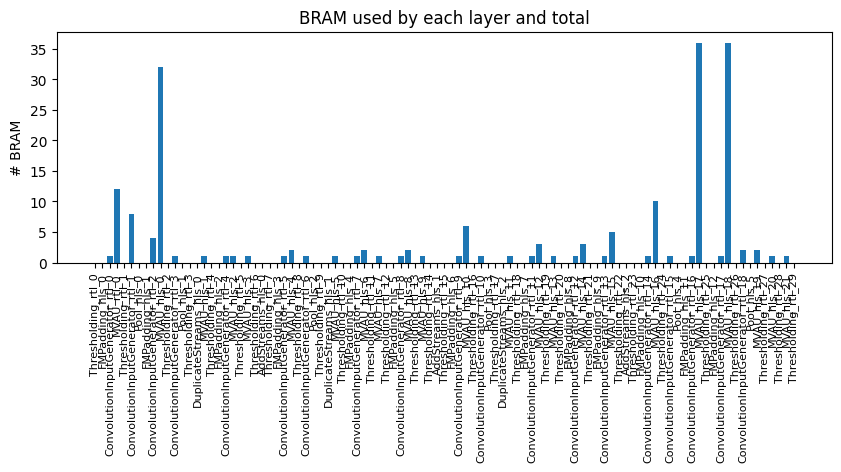

In [8]:
print(f'Total #BRAM used: {bram_res["total"]}')

fig, ax = plt.subplots(figsize=(10,3))

layers_name = list(bram_res.keys())[:-1]
counts = list(bram_res.values())[:-1]

ax.bar(layers_name, counts)

ax.set_ylabel('# BRAM')
ax.set_title('BRAM used by each layer and total')
ax.set_xticks(np.arange(len(layers_name)), layers_name, rotation=90, fontsize=8)

plt.show()

# Alternative Resources

In [9]:
bram_0 = {}
lut_0 = {}
dsp_0 = {}

bram_1 = {}
lut_1 = {}
dsp_1 = {}

bram_list = [bram_0, bram_1]
lut_list = [lut_0, lut_1]
dsp_list = [dsp_0, dsp_1]

In [10]:
for k in alternatives_config.keys():
    if ("Thresholding" in k) or ("Pool" in k):
        continue
    elif "Convolution" in k:
        for i in range(2):
            bram_list[i].update({k: alternatives_config[k][i]["BRAM_18K"]})
            lut_list[i].update({k: alternatives_config[k][i]["LUT"]})
            dsp_list[i].update({k: alternatives_config[k][i]["DSP"]})
    elif "MVAU" in k:
        for i in range(2):
            bram_list[i].update({k: alternatives_config[k][i]["BRAM_18K"]})
            lut_list[i].update({k: alternatives_config[k][i]["LUT"]})
            dsp_list[i].update({k: alternatives_config[k][i]["DSP"]})
    elif "VVAU" in k:
        for i in range(2):
            bram_list[i].update({k: alternatives_config[k][i]["BRAM_18K"]})
            lut_list[i].update({k: alternatives_config[k][i]["LUT"]})
            dsp_list[i].update({k: alternatives_config[k][i]["DSP"]})

In [11]:
dsp_list[1]

{'ConvolutionInputGenerator_rtl_0': 0,
 'MVAU_rtl_0': 27,
 'ConvolutionInputGenerator_rtl_1': 0,
 'ConvolutionInputGenerator_rtl_2': 0,
 'MVAU_hls_0': 0,
 'ConvolutionInputGenerator_rtl_3': 0,
 'MVAU_hls_1': 0,
 'ConvolutionInputGenerator_rtl_4': 0,
 'MVAU_hls_2': 0,
 'MVAU_hls_3': 0,
 'ConvolutionInputGenerator_rtl_5': 0,
 'MVAU_hls_4': 0,
 'ConvolutionInputGenerator_rtl_6': 0,
 'MVAU_hls_5': 0,
 'ConvolutionInputGenerator_rtl_7': 0,
 'MVAU_hls_6': 0,
 'MVAU_hls_7': 0,
 'ConvolutionInputGenerator_rtl_8': 0,
 'MVAU_hls_8': 0,
 'MVAU_hls_9': 0,
 'ConvolutionInputGenerator_rtl_9': 0,
 'MVAU_hls_10': 0,
 'ConvolutionInputGenerator_rtl_10': 0,
 'MVAU_hls_11': 0,
 'ConvolutionInputGenerator_rtl_11': 0,
 'MVAU_hls_12': 0,
 'MVAU_hls_13': 0,
 'ConvolutionInputGenerator_rtl_12': 0,
 'MVAU_hls_14': 0,
 'ConvolutionInputGenerator_rtl_13': 0,
 'MVAU_hls_15': 0,
 'ConvolutionInputGenerator_rtl_14': 0,
 'MVAU_hls_16': 0,
 'ConvolutionInputGenerator_rtl_15': 0,
 'ConvolutionInputGenerator_rtl_16': 0

In [12]:
conv_lut = {
    "LUT_wBRAM": {k: v for k, v in lut_list[0].items() if "Convolution" in k}, 
    "LUT_woBRAM": {k: v for k, v in lut_list[1].items() if "Convolution" in k},
}

mvau_lut = {
    "LUT_wDSP": {k: v for k, v in lut_list[0].items() if (("MVAU" in k) or ("VVAU" in k)) }, 
    "LUT_woDSP": {k: v for k, v in lut_list[1].items() if (("MVAU" in k) or ("VVAU" in k))},
}

mvau_dsp = {
    "wDSP": {k: v for k, v in dsp_list[0].items() if (("MVAU" in k) or ("VVAU" in k))}, 
    "woDSP": {k: v for k, v in dsp_list[1].items() if (("MVAU" in k) or ("VVAU" in k))},
}

In [13]:
mvau_lut

{'LUT_wDSP': {'MVAU_rtl_0': 0,
  'MVAU_hls_0': 5376,
  'MVAU_hls_1': 313,
  'MVAU_hls_2': 377,
  'MVAU_hls_3': 322,
  'MVAU_hls_4': 624,
  'MVAU_hls_5': 314,
  'MVAU_hls_6': 378,
  'MVAU_hls_7': 314,
  'MVAU_hls_8': 378,
  'MVAU_hls_9': 323,
  'MVAU_hls_10': 520,
  'MVAU_hls_11': 311,
  'MVAU_hls_12': 348,
  'MVAU_hls_13': 309,
  'MVAU_hls_14': 348,
  'MVAU_hls_15': 388,
  'MVAU_hls_16': 415,
  'MVAU_hls_17': 395,
  'MVAU_hls_18': 449,
  'MVAU_hls_19': 333,
  'MVAU_hls_20': 322,
  'MVAU_hls_21': 322},
 'LUT_woDSP': {'MVAU_rtl_0': 0,
  'MVAU_hls_0': 12979,
  'MVAU_hls_1': 317,
  'MVAU_hls_2': 412,
  'MVAU_hls_3': 330,
  'MVAU_hls_4': 782,
  'MVAU_hls_5': 318,
  'MVAU_hls_6': 413,
  'MVAU_hls_7': 318,
  'MVAU_hls_8': 413,
  'MVAU_hls_9': 331,
  'MVAU_hls_10': 625,
  'MVAU_hls_11': 313,
  'MVAU_hls_12': 368,
  'MVAU_hls_13': 312,
  'MVAU_hls_14': 368,
  'MVAU_hls_15': 427,
  'MVAU_hls_16': 468,
  'MVAU_hls_17': 439,
  'MVAU_hls_18': 660,
  'MVAU_hls_19': 372,
  'MVAU_hls_20': 348,
  'MVAU

# Layers Name to plot

In [14]:
conv_layers = [k for k in alternatives_config.keys() if "Convolution" in k]
mvau_layers = [k for k in alternatives_config.keys() if (("MVAU" in k) or ("VVAU" in k))]

# Layers Values to plot

In [15]:
conv_lut_opt = {
    "wBRAM": list(conv_lut["LUT_wBRAM"].values()),
    "woBRAM": list(conv_lut["LUT_woBRAM"].values()),
}

mvau_lut_opt = {
    "wDSP": list(mvau_lut["LUT_wDSP"].values()),
    "woDSP": list(mvau_lut["LUT_woDSP"].values()),
}

mvau_dsp_opt = {
    "wDSP": list(mvau_dsp["wDSP"].values()),
    "woDSP": list(mvau_dsp["woDSP"].values()),
}

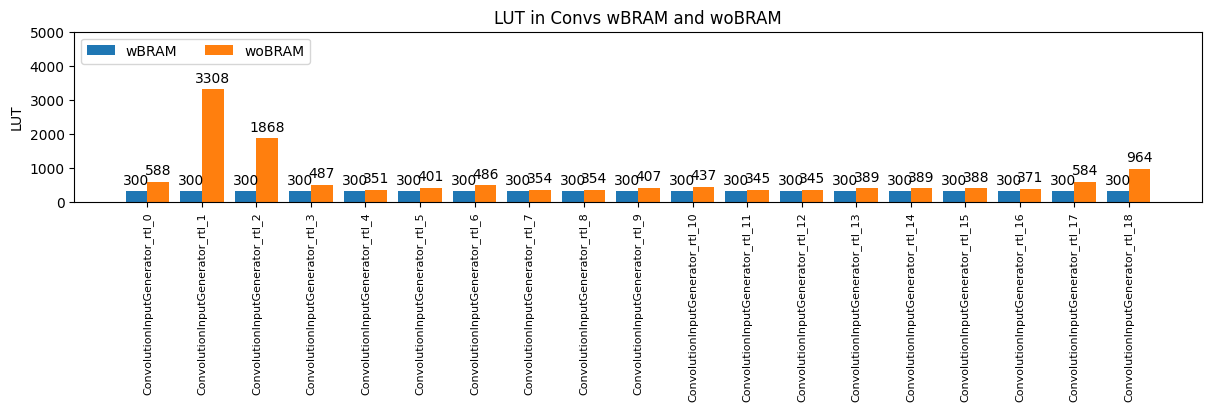

In [16]:
x = np.arange(len(conv_layers))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 4))

for attribute, measurement in conv_lut_opt.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('LUT')
ax.set_title('LUT in Convs wBRAM and woBRAM')
ax.set_xticks(x + width/2, conv_layers, rotation=90, fontsize = 8)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 5000)

plt.show()

Total number of DSP used: 578


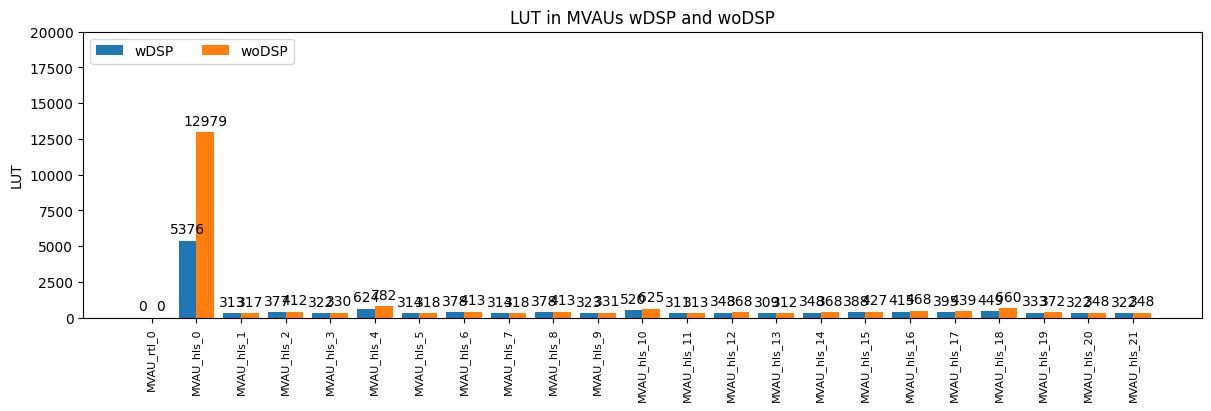

In [17]:
print(f'Total number of DSP used: {np.array(list(dsp_list[0].values())).sum()}')

x = np.arange(len(mvau_layers))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 4))

for attribute, measurement in mvau_lut_opt.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('LUT')
ax.set_title('LUT in MVAUs wDSP and woDSP')
ax.set_xticks(x + width/2, mvau_layers, rotation=90, fontsize = 8)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 20000)

plt.show()

# DSP used in alternatives

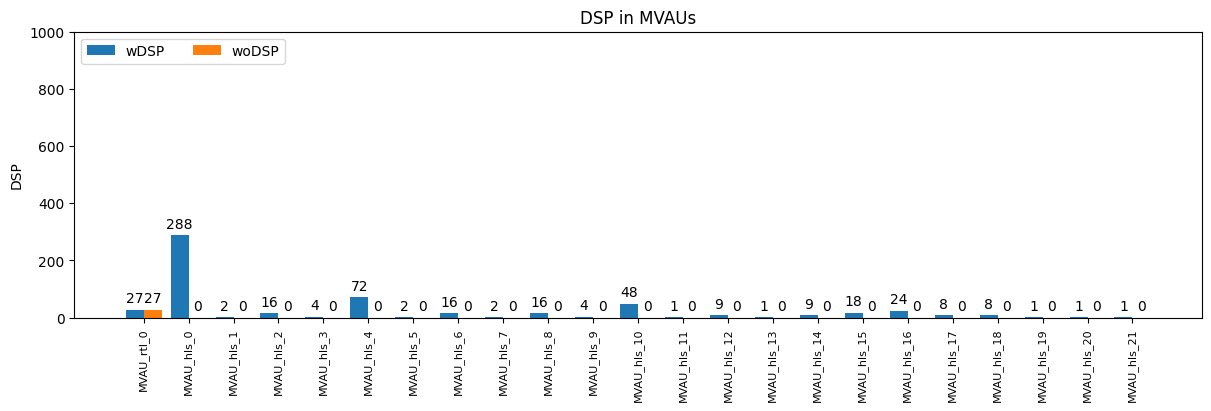

In [18]:
x = np.arange(len(mvau_layers))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 4))

for attribute, measurement in mvau_dsp_opt.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('DSP')
ax.set_title('DSP in MVAUs')
ax.set_xticks(x + width/2, mvau_layers, rotation=90, fontsize = 8)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1000)

plt.show()

In [19]:
print(mvau_dsp_opt)
print(f'Total DSP alternative config 1: {np.array(mvau_dsp_opt["wDSP"]).sum()}')
print(f'Total DSP alternative config 2: {np.array(mvau_dsp_opt["woDSP"]).sum()}')

{'wDSP': [27, 288, 2, 16, 4, 72, 2, 16, 2, 16, 4, 48, 1, 9, 1, 9, 18, 24, 8, 8, 1, 1, 1], 'woDSP': [27, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
Total DSP alternative config 1: 578
Total DSP alternative config 2: 27
